In [263]:
# loading libraries
import igor.igorpy as igor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
#load excel file
waveInfo = pd.read_excel('2016.10.26_Cell1.xlsx')

#is changing the index necessary? If so should do automatically
waveInfo.tail()

,waveNum,waveName,stimInt,notes
73,74,w80,600.0,y
74,75,w81,800.0,y
75,76,w82,800.0,y
76,77,w83,1000.0,lastMax
77,78,w84,1000.0,lastMax


In [32]:
date = '2016.10.19'
cellNum = 1
age = 15

#Load csv
igor = pd.read_csv('igorForPython.csv', index_col = 0)

In [48]:
igorWaves = igor.pivot(index='sec', columns='id', values='pA')
igorWaves.head()

id,w1,w10,w100,w101,w102,w103,w104,w105,w106,w107,...,w90,w91,w92,w93,w94,w95,w96,w97,w98,w99
sec,,,,,,,,,,,,,,,,,,,,,
0.00000,5.283691,-1.231331,1.660751,0.580154,0.916258,0.352314,-0.986023,0.143188,-2.377863,-1.548706,...,-1.453011,-0.746902,-3.679989,-0.158188,0.745697,3.199509,2.005676,-2.347969,-0.296299,-0.826656
0.00001,-0.965820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00002,-4.403320,-0.606361,2.285721,0.580154,1.228743,0.664799,-0.361053,-1.106750,-3.627802,-2.486160,...,-1.765495,-1.684357,-3.679989,-0.470673,1.370667,2.262054,2.005676,-2.660454,-0.921268,0.423283
0.00003,-6.590332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00004,-5.653320,-0.293877,1.348267,1.517609,1.228743,-0.272655,0.263916,0.143188,-3.940287,-0.923737,...,-1.453011,-0.746902,-3.367504,-0.158188,1.683151,1.949570,3.255615,-2.972939,-1.858723,-1.139141


In [304]:
#waveName column of waveInfo
waveNames = waveInfo['waveName']

#filter igorWaves by waveInfo
wavesToAnalyze = igorWaves.filter(waveNames)
wavesToAnalyze = wavesToAnalyze.dropna(axis = 0)
#dropping NaNs removes tail end of tau trace; will have to specify tau trace separately

wavesToAnalyze.head()

id,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,...,w75,w76,w77,w78,w79,w80,w81,w82,w83,w84
sec,,,,,,,,,,,,,,,,,,,,,
0.00000,0.948830,-3.059967,1.289867,-1.231331,-0.434429,2.303024,1.274933,0.613708,0.796894,1.317093,...,4.723364,1.359512,-1.399342,1.061974,1.475237,2.330578,-3.692544,-1.730488,-1.836338,-1.835079
0.00002,0.323860,-3.059967,-0.897526,-0.606361,-1.684368,2.615509,0.024994,0.301224,2.671803,2.567032,...,4.098394,1.359512,-1.711826,2.624397,0.850267,2.018093,-3.067575,-0.793034,-2.461308,-1.522594
0.00004,0.323860,-2.434998,0.039928,-0.293877,-1.996853,1.053085,0.649963,-0.636230,2.359318,2.567032,...,3.785910,1.359512,-1.711826,2.624397,2.412691,2.018093,-3.692544,-2.355457,-1.836338,-1.522594
0.00006,0.948830,-2.747482,0.039928,0.956062,-0.746914,0.740601,0.962448,0.613708,1.421864,1.942062,...,4.098394,1.671997,-1.086857,1.999428,0.850267,2.330578,-3.692544,-1.730488,-2.773792,-2.772533
0.00008,-0.301109,-1.185059,-1.210011,0.643578,-1.684368,2.303024,-0.287491,-0.011261,1.421864,3.504486,...,3.785910,1.047028,-1.711826,2.624397,1.162752,2.330578,-1.505151,-0.480549,-2.461308,-2.147564


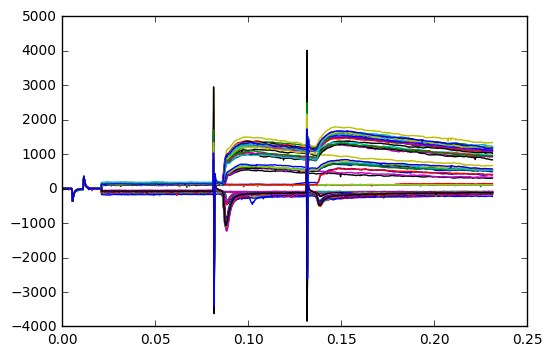

In [66]:
plt.plot(wavesToAnalyze)
plt.show()

In [313]:
#remove stimulus artifacts

timeBeginFirstArtifact = 0.081 
timeEndFirstArtifact = 0.0845 #generally 0.0845

firstArtifact = pd.Series(np.arange(0.0810, 0.0846, 0.0001))
firstArtifact

0     0.0810
1     0.0811
2     0.0812
3     0.0813
4     0.0814
5     0.0815
6     0.0816
7     0.0817
8     0.0818
9     0.0819
10    0.0820
11    0.0821
12    0.0822
13    0.0823
14    0.0824
15    0.0825
16    0.0826
17    0.0827
18    0.0828
19    0.0829
20    0.0830
21    0.0831
22    0.0832
23    0.0833
24    0.0834
25    0.0835
26    0.0836
27    0.0837
28    0.0838
29    0.0839
30    0.0840
31    0.0841
32    0.0842
33    0.0843
34    0.0844
35    0.0845
dtype: float64

In [310]:
#how to specify a range without manually entering all the sec (index) values?
#or write a for loop? but problems with incompatible conditional statements (str vs float)
wavesToAnalyze.loc[[0.0810], :] = np.nan
wavesToAnalyze.loc[[0, 0.0810, 0.0811, 0.0812], :]

id,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,...,w75,w76,w77,w78,w79,w80,w81,w82,w83,w84
sec,,,,,,,,,,,,,,,,,,,,,
0.0000,0.948830,-3.059967,1.289867,-1.231331,-0.434429,2.303024,1.274933,0.613708,0.796894,1.317093,...,4.723364,1.359512,-1.399342,1.061974,1.475237,2.330578,-3.692544,-1.730488,-1.836338,-1.835079
0.0810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0811,-168.730377,175.368820,-123.704025,190.321808,-114.803848,133.859100,-109.969635,144.044205,-102.010590,130.685776,...,-69.960487,114.166504,-72.020889,120.431145,-66.958923,134.199142,-61.189735,145.449829,-73.395340,141.595413
0.0812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
#why are only the first two rows included?
test = wavesToAnalyze.filter(firstArtifact, axis = 0)
test

id,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,...,w75,w76,w77,w78,w79,w80,w81,w82,w83,w84
sec,,,,,,,,,,,,,,,,,,,,,
0.0810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0811,-168.730377,175.36882,-123.704025,190.321808,-114.803848,133.8591,-109.969635,144.044205,-102.01059,130.685776,...,-69.960487,114.166504,-72.020889,120.431145,-66.958923,134.199142,-61.189735,145.449829,-73.39534,141.595413


In [297]:
#rows of first stim artifact; why are odd rows not included?
wavesToAnalyze.iloc[4005:4024, :]
#wavesToAnalyze.loc[[0.0811], :]

id,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,...,w75,w76,w77,w78,w79,w80,w81,w82,w83,w84
sec,,,,,,,,,,,,,,,,,,,,,
0.08010,-168.105408,163.181915,-129.328751,187.821930,-115.116333,135.421524,-110.907089,143.106750,-109.197739,131.310745,...,-64.648247,115.728928,-71.395920,120.118660,-73.208618,127.011993,-62.127190,138.575165,-72.145401,134.720749
0.08012,-167.480438,163.806885,-129.016266,188.134430,-114.491364,135.109039,-110.907089,144.356689,-110.447678,129.435837,...,-63.398308,116.041412,-71.708405,119.181206,-74.458557,126.699509,-62.439674,139.200134,-72.145401,134.095779
0.08014,-167.167969,164.431854,-129.641235,186.884491,-115.116333,135.734009,-110.907089,143.731720,-109.510223,130.373291,...,-64.023277,115.416443,-71.708405,119.181206,-74.146072,127.949448,-61.502220,139.825104,-72.770370,134.720749
0.08016,-167.480438,165.369308,-129.953720,187.509460,-114.803848,134.484070,-110.594604,142.481781,-108.885254,130.685776,...,-64.648247,116.041412,-71.083435,118.868721,-74.146072,126.699509,-63.064644,138.262680,-72.145401,134.720749
0.08018,-166.542999,165.994278,-129.328751,188.134430,-113.866394,134.484070,-111.219574,142.794266,-109.197739,129.435837,...,-63.398308,116.041412,-72.333374,118.556236,-73.833588,126.074539,-62.127190,138.262680,-71.832916,133.783295
0.08020,-168.105408,167.244217,-130.578690,187.196960,-114.178879,135.734009,-110.907089,141.856812,-108.885254,130.060806,...,-65.273216,115.103958,-71.395920,119.181206,-73.208618,126.699509,-61.502220,139.512619,-73.082855,134.408264
0.08022,-167.792938,167.244217,-129.953720,187.509460,-114.491364,134.484070,-109.969635,140.606873,-107.635315,130.060806,...,-64.960732,115.728928,-70.770950,118.243752,-74.458557,126.387024,-63.064644,138.262680,-72.145401,134.720749
0.08024,-167.792938,167.869186,-129.953720,187.821930,-114.491364,134.484070,-110.907089,139.981903,-108.260284,130.373291,...,-63.398308,115.103958,-72.020889,117.931267,-74.458557,125.762054,-62.439674,138.575165,-72.145401,134.408264
0.08026,-168.730377,169.119125,-129.328751,188.134430,-114.491364,134.484070,-110.594604,138.731964,-107.010345,129.435837,...,-64.648247,115.416443,-71.708405,118.243752,-73.521103,124.199631,-62.439674,139.512619,-72.457886,134.720749
